<a href="https://colab.research.google.com/github/afeef2003/task-7/blob/main/task_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install yfinance scikit-learn matplotlib pandas

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Simple Amazon Stock Price Prediction")
print("=" * 40)

Simple Amazon Stock Price Prediction


In [ ]:
# Step 1: Get Amazon stock data
print("1. Getting Amazon stock data...")

# Option 1: Download automatically (recommended)
# data = yf.download("AMZN", period="2y")  # 2 years of data

# Option 2: Upload your own CSV file (uncomment if you have a file)
from google.colab import files
uploaded = files.upload()  # This will show upload button
data = pd.read_csv('/content/AMZN_stock_data.csv', index_col=0, parse_dates=True)

# Option 3: Load from Google Drive (uncomment if file is in Drive)
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/MyDrive/amazon_stock_data.csv', index_col=0, parse_dates=True)

print(f"Loaded {len(data)} days of data")

1. Getting Amazon stock data...


Saving AMZN_stock_data.csv to AMZN_stock_data (1).csv
Loaded 6987 days of data


In [ ]:
# Step 2: Prepare the data
print("\n2. Preparing data...")
df = data.copy()

# Create simple features
df['Next_Close'] = df['Close'].shift(-1)  # Target: next day's price
df['Price_Change'] = df['Close'] - df['Open']
df['High_Low_Diff'] = df['High'] - df['Low']
df['Prev_Close'] = df['Close'].shift(1)  # Previous day's price

# Remove rows with missing data
df = df.dropna()

print(f"Dataset shape: {df.shape}")
print("Features: Open, High, Low, Close, Volume, Price_Change, High_Low_Diff, Prev_Close")


2. Preparing data...
Dataset shape: (6985, 11)
Features: Open, High, Low, Close, Volume, Price_Change, High_Low_Diff, Prev_Close


In [ ]:
# Step 3: Prepare features and target
print("\n3. Setting up features and target...")
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'High_Low_Diff', 'Prev_Close']
X = df[features]
y = df['Next_Close']

print(f"Number of samples: {len(X)}")
print(f"Number of features: {len(features)}")


3. Setting up features and target...
Number of samples: 6985
Number of features: 8


In [ ]:
# Step 4: Split data into training and testing
print("\n4. Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


4. Splitting data...
Training samples: 5588
Testing samples: 1397


In [ ]:
# Step 5: Train machine learning models
print("\n5. Training models...")

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Models trained successfully!")


5. Training models...
Models trained successfully!


In [ ]:
# Step 6: Evaluate models
print("\n6. Evaluating models...")

# Linear Regression metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression:")
print(f"  Mean Squared Error: {lr_mse:.2f}")
print(f"  R² Score: {lr_r2:.4f}")

print("\nRandom Forest:")
print(f"  Mean Squared Error: {rf_mse:.2f}")
print(f"  R² Score: {rf_r2:.4f}")

# Determine best model
if rf_r2 > lr_r2:
    best_model = "Random Forest"
    best_score = rf_r2
    best_pred = rf_pred
else:
    best_model = "Linear Regression"
    best_score = lr_r2
    best_pred = lr_pred

print(f"\nBest Model: {best_model} (R² = {best_score:.4f})")


6. Evaluating models...
Linear Regression:
  Mean Squared Error: 1.96
  R² Score: 0.9994

Random Forest:
  Mean Squared Error: 2.29
  R² Score: 0.9993

Best Model: Linear Regression (R² = 0.9994)



7. Creating visualizations...


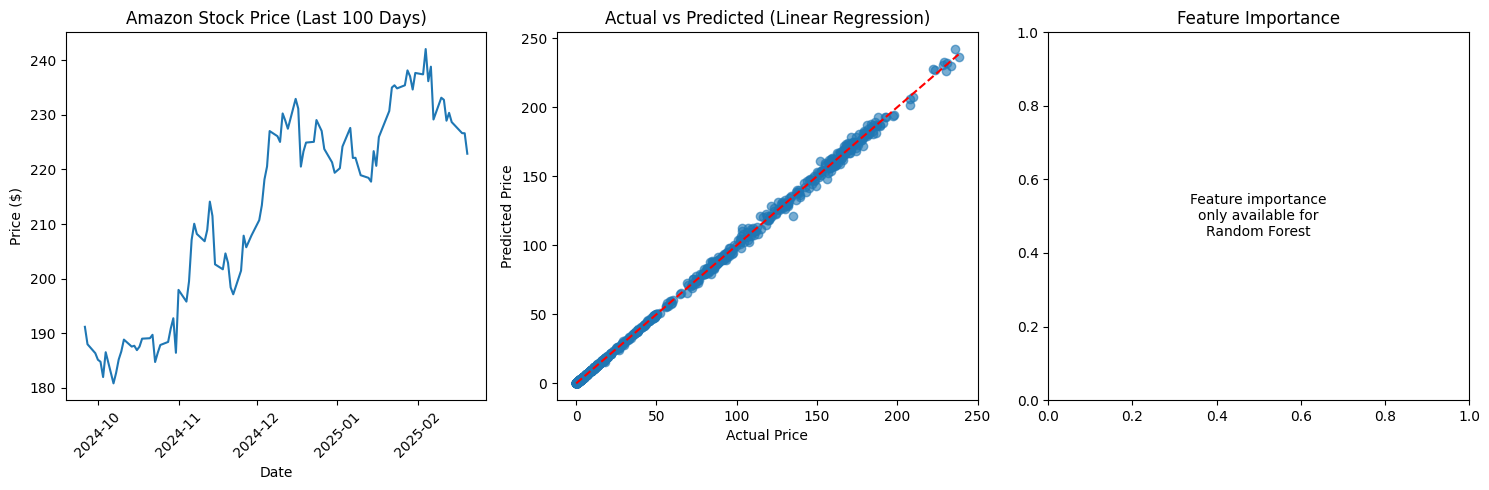

In [ ]:
# Step 7: Visualize results
print("\n7. Creating visualizations...")

plt.figure(figsize=(15, 5))

# Plot 1: Stock price over time
plt.subplot(1, 3, 1)
plt.plot(df.index[-100:], df['Close'][-100:])
plt.title('Amazon Stock Price (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

# Plot 2: Actual vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted ({best_model})')

# Plot 3: Feature importance (Random Forest only)
plt.subplot(1, 3, 3)
if best_model == "Random Forest":
    importance = rf_model.feature_importances_
    plt.bar(features, importance)
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Feature importance\nonly available for\nRandom Forest',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance')

plt.tight_layout()
plt.show()

In [ ]:
# Step 8: Make a prediction
print("\n8. Making next day prediction...")
last_data = X.iloc[-1:].values

if best_model == "Random Forest":
    next_day_pred = rf_model.predict(last_data)[0]
else:
    next_day_pred = lr_model.predict(last_data)[0]

current_price = df['Close'].iloc[-1]
predicted_change = next_day_pred - current_price

print(f"Current price: ${current_price:.2f}")
print(f"Predicted next day price: ${next_day_pred:.2f}")
print(f"Predicted change: ${predicted_change:.2f}")

# Summary
print("\n" + "="*40)
print("SUMMARY")
print("="*40)
print(f"✓ Downloaded {len(data)} days of Amazon stock data")
print(f"✓ Created {len(features)} features")
print(f"✓ Trained 2 machine learning models")
print(f"✓ Best model: {best_model}")
print(f"✓ Model accuracy (R²): {best_score:.4f}")
print(f"✓ Next day prediction: ${next_day_pred:.2f}")
print("="*40)
print("Task 7 completed successfully!")


8. Making next day prediction...
Current price: $222.88
Predicted next day price: $222.91
Predicted change: $0.03

SUMMARY
✓ Downloaded 6987 days of Amazon stock data
✓ Created 8 features
✓ Trained 2 machine learning models
✓ Best model: Linear Regression
✓ Model accuracy (R²): 0.9994
✓ Next day prediction: $222.91
Task 7 completed successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
